# 27 - Final Exam Review

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

## Python Basics
Be familiar with the different variable types and understand how to use them. See the [Python Foundations page.](https://clint-bg.github.io/comptools/foundations/pythonresources.html) 

## Functions and Objects

How would you sum every third number from 1007 to 2023 using python? Can you set that up as a function? Can you now set that function up as part of an object?

## Solving Equations

How would you solve multiple coupled, non-linear equations in python? Can you set that up as a function? Can you now set that function up as part of an object?

## ODEInt Review

Example of using ODEInt to solve a system of ODEs with SEIRD model (S: susceptible, E: exposed, I: infected, R: recovered, D: dead). The SEIRD model approximates the number of people infected with a contagious illness in a population. The model is expressed as a system of differential equations and is solved numerically.


In [2]:
def deriv(y, t, N, beta, gamma, delta, rho):
    S, E, I, R, D = y
    dSdt = -beta * S * I / N
    dEdt = beta * S * I / N - delta * E
    dIdt = delta * E - gamma * I - rho * I
    dRdt = gamma * I
    dDdt = rho * I
    return dSdt, dEdt, dIdt, dRdt, dDdt

In [3]:
#initial values
N = 1000000
D = 14.0
gamma = 1.0 / D
delta = 1.0 / 5.0
rho = 0.01
beta = 2.5 * gamma
S0, E0, I0, R0, D0 = N-1, 1, 0, 0, 0
y = S0, E0, I0, R0, D0

In [4]:
# solution
t = np.linspace(0, 365, 365)
sol = odeint(deriv, y, t, args=(N, beta, gamma, delta, rho))

In [5]:
sol.shape

(365, 5)

In [6]:
sol.T.shape

(5, 365)

We'll transpose the solution with the .T operator so that we can plot the solution for each variable as a function of time.

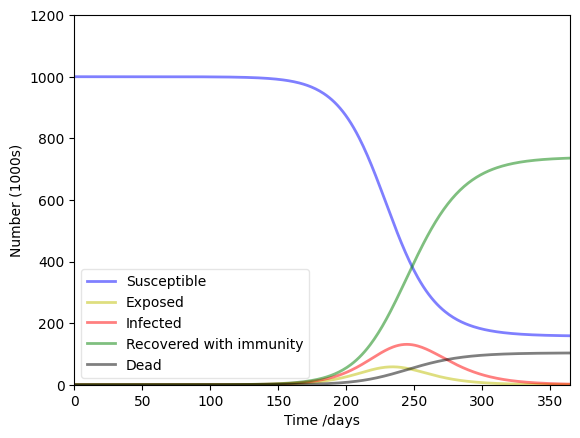

In [7]:
#plot results
S, E, I, R, D = sol.T
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, axisbelow=True)
ax.plot(t, S/1000, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, E/1000, 'y', alpha=0.5, lw=2, label='Exposed')
ax.plot(t, I/1000, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R/1000, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.plot(t, D/1000, 'k', alpha=0.5, lw=2, label='Dead')
ax.set_xlabel('Time /days')
ax.set_ylabel('Number (1000s)')
ax.set_ylim(0,1200)
ax.set_xlim(0,365)
#ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
plt.show()

Doing the same integration of the SEIRD model in Excel using Euler's method is given here: https://github.com/clint-bg/comptools/blob/main/lectures/supportfiles/inclasseulerdisease.xlsx?raw=true 

## Regression Review

Different methods of regression include:
- Linear Regression
- Polynomial Regression
- Custom relationship using curve_fit or least_squares or minimize

Examples could include:
- Fitting a line to a set of data
- Fitting a polynomial to a set of data
- Fitting a custom relationship to a set of data

In [8]:
#a simple example scenario of regression with python
# 1st generate some data
x = np.arange(0,11,1)
y = 3.2*x + 5 + [np.random.rand()*4 for each in x]

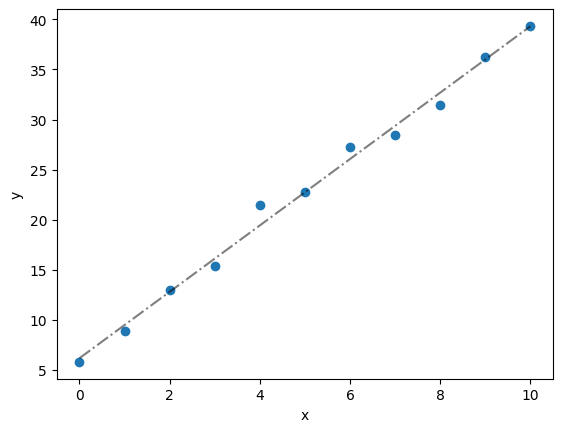

In [9]:
# 2nd fit the data, first use np.polyfit
fit = np.polyfit(x,y,1) #fit yields the two coefficients of the linear regression (slope and intercept)
#if you forget what np.polyfit does, type help(np.polyfit) in the console or np.polyfit?
# 3rd plot the data and the fit
# 2nd plot the data
plt.scatter(x,y)
plt.plot(x,fit[0]*x+fit[1],'k-.',alpha=0.5)
plt.xlabel('x'); plt.ylabel('y'); plt.show()

In [10]:
# Now we can calculate the R^2 and MAPE values
# R^2
ymodel = fit[0]*x+fit[1]
SStot = np.sum((y-np.mean(y))**2) #total sum of squares - how much different is the data from the mean
SSE = np.sum((y-ymodel)**2) #sum of squares of the error - how much different is the data from the model
R2 = 1 - SSE/SStot
print(f'R2 = {R2:.3f}')


R2 = 0.993


In [11]:
#Now the MAPE value
MAPE = np.mean(np.abs((y-ymodel)/y)*100)
print(f'MAPE = {MAPE:1.2f}%')

MAPE = 3.74%


In [12]:
#Now we could fit the same data to a custom model using scipy.optimize.curve_fit
from scipy.optimize import curve_fit
def mymodel(x,a,b):
    return a*x*np.cosh(x) + b
popt, pcov = curve_fit(mymodel,x,y)
print(f'popt = {popt}')
# the same methods of R2, MAPE and plotting can be done as above

popt = [2.19815734e-04 1.94485857e+01]


## Integration Review
- Python quad
- Trapezoid method

In [13]:
#an example of the quad function to calculate the integral of the above regressed function
from scipy.integrate import quad
area = quad(mymodel,0,10,args=(popt[0],popt[1]))[0]
print(f'area of mymodel fit between 0 and 10 = {area:1.2f}')

area of mymodel fit between 0 and 10 = 216.27


## Interpolation Review
 - Linear
 - Cubic

In [14]:
# an example of Cubic Spline interpolation
from scipy.interpolate import CubicSpline
f = CubicSpline(x,y)
f(3.4)

array(17.82923304)

Many of the same things done above can be completed in Excel. Click this link to see an example of linear regression and integration with the trapezoid method: https://github.com/clint-bg/comptools/blob/main/lectures/supportfiles/LinearRegIntegrateEx.xlsx?raw=true